In [2]:
from typing import TypedDict, Literal

In [3]:
#creating a state
class PortfolioState(TypedDict):
    amount_usd: float
    total_usd: float
    target_currency: Literal["INR","EUR"]
    total: float

In [4]:
#reating functinos for nodes
def calc_total(state: PortfolioState)-> PortfolioState:
    state["total_usd"] = state["amount_usd"] * 1.08
    return state

def convert_inr(state: PortfolioState)-> PortfolioState:
    state["total"] = state["total_usd"] * 87.65
    return state

def convert_eur(state: PortfolioState)-> PortfolioState:
    state["total"] = state["total_usd"] * 0.85
    return state

def choose_conversion(state: PortfolioState)-> PortfolioState:
    return state["target_currency"]

In [8]:
from langgraph.graph import StateGraph, START, END

builder = StateGraph(PortfolioState)

builder.add_node("calc_total_node", calc_total)
builder.add_node("convert_inr_node", convert_inr)
builder.add_node("convert_eur_node", convert_eur)

#creatintg edges
builder.add_edge(START, "calc_total_node")
builder.add_conditional_edges(
    "calc_total_node",
    choose_conversion,
    {
        "INR" : "convert_inr_node",
        "EUR" : "convert_eur_node",
    }
)
builder.add_edge(["convert_inr_node", "convert_eur_node"], END)

graph = builder.compile()


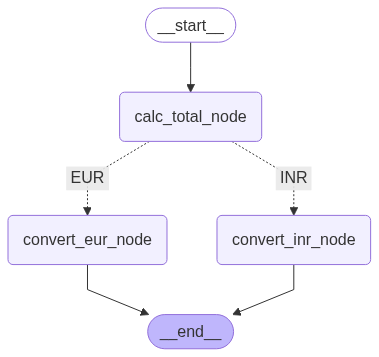

In [11]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [12]:
graph.invoke({"amount_usd":1000, "target_currency":"INR"})

{'amount_usd': 1000,
 'total_usd': 1080.0,
 'target_currency': 'INR',
 'total': 94662.0}

In [13]:
graph.invoke({"amount_usd":1000,"target_currency":"EUR"})

{'amount_usd': 1000,
 'total_usd': 1080.0,
 'target_currency': 'EUR',
 'total': 918.0}

In [1]:
print("all righttt")

all righttt
